<a href="https://colab.research.google.com/github/ThakurPSB/ThakurPSB/blob/main/Twitter_Bill_Gates_Sentiment_using_textblob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Sentiment analysis program that parses the tweets fetch from twitter using python 

In [ ]:
# importing libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# loading the keys
from google.colab import files
uploaded = files.upload()

Saving twitter api piyushthakur.csv to twitter api piyushthakur (3).csv


In [ ]:
# get the keys
log = pd.read_csv('twitter api piyushthakur (3).csv')

In [ ]:
log

,key
0,EShFNBxOwgpWhBRjCykGgIihQ
1,PbklNOeJiIRqEF2N5LPA5h8aQPRDqClRKgJ06z0X1SpNe0...
2,1414827426190819328-SnyOrpvNbxWOKEMfvjQosft6uF...
3,cJsUdQ1Gfmo0gQhJ8SZJkI9w2aHHIWiJj8SJ4IbSlSGaT


In [ ]:
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]


In [ ]:
# create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# set the access tken and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create API object while passing in the auth info
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = 'BillGates', count = 100, lang = 'en', tweet_mode = 'extended')

# print last 5 tweets from the account
print('show the 5 recent tweets : \n')
for i,tweet in enumerate(posts[0:5]):
  print(str(i+1) + ') ' + tweet.full_text + '\n')

show the 5 recent tweets : 

1) RT @MSuzman: We take one step closer to a malaria-free world with this exciting new project that seeks to develop an mRNA-based malaria vac…

2) I’ve been rewatching some of my favorite movies. Add your favorites to the list on @Likewise. https://t.co/bEgD4aMmSU

3) Getting an early start on my weekend reading: this article does a good job explaining immunity and what may happen with COVID-19 in the future. https://t.co/AHatTlUdOr

4) During the height of the U.S. polio epidemic, the iron lung was one of the greatest tools used to fight polio. Today, it’s the iron will of the thousands of workers and their supporters who are committed to finishing the job. https://t.co/oAzGsIGSUN #endpolio

5) RT @UN: Let us renew our determination to build a strong, sustainable and inclusive recovery from the pandemic, and to take decisive action…



In [ ]:
# create a dataframe with column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

# show the data 
df.head()

,Tweets
0,RT @MSuzman: We take one step closer to a mala...
1,I’ve been rewatching some of my favorite movie...
2,Getting an early start on my weekend reading: ...
3,"During the height of the U.S. polio epidemic, ..."
4,RT @UN: Let us renew our determination to buil...


In [ ]:
# cleaning the tweets

# creating function for cleaning
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+' , '', text) # remove the @ mentions
  text = re.sub(r'#', '', text) # removeing the hashtags symbols
  text = re.sub(r'RT[\s]+', '', text) # removing the retweets
  text = re.sub(r'https?:\/\/\S+', '', text) # remove the hyperlinks

  return text

# Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# show clean text
df

,Tweets
0,: We take one step closer to a malaria-free wo...
1,I’ve been rewatching some of my favorite movie...
2,Getting an early start on my weekend reading: ...
3,"During the height of the U.S. polio epidemic, ..."
4,: Let us renew our determination to build a st...
...,...
95,"Thanks to , , and everyone who joined our virt..."
96,Great to see this important step as the United...
97,Thanks to for hosting the launch of my virtua...
98,": Bill Gates on Climate Change, Covid and Whet..."


In [ ]:
# Create a function to get the subjectivity 
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create a functino to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# creating two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,: We take one step closer to a malaria-free wo...,0.627273,0.218182
1,I’ve been rewatching some of my favorite movie...,1.000000,0.500000
2,Getting an early start on my weekend reading: ...,0.341667,0.266667
3,"During the height of the U.S. polio epidemic, ...",1.000000,1.000000
4,: Let us renew our determination to build a st...,0.733333,0.433333
...,...,...,...
95,"Thanks to , , and everyone who joined our virt...",0.537500,0.400000
96,Great to see this important step as the United...,0.437500,0.300000
97,Thanks to for hosting the launch of my virtua...,0.487500,0.475000
98,": Bill Gates on Climate Change, Covid and Whet...",0.200000,0.200000


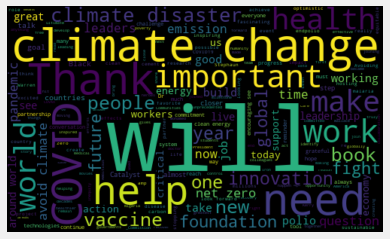

In [ ]:
# Creating the word cloud
allWords = ' '.join( [twt for twt in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis ('off')
plt.show()

In [ ]:
# create function to compute the negative neutral and positive analysis
def getAnalysis(score):
  if score < 0 :
    return 'Negative'
  elif score == 0 :
    return 'Neutral'
  else:
    return 'Positive'

# creating new columns
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# show dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,: We take one step closer to a malaria-free wo...,0.627273,0.218182,Positive
1,I’ve been rewatching some of my favorite movie...,1.000000,0.500000,Positive
2,Getting an early start on my weekend reading: ...,0.341667,0.266667,Positive
3,"During the height of the U.S. polio epidemic, ...",1.000000,1.000000,Positive
4,: Let us renew our determination to build a st...,0.733333,0.433333,Positive
...,...,...,...,...
95,"Thanks to , , and everyone who joined our virt...",0.537500,0.400000,Positive
96,Great to see this important step as the United...,0.437500,0.300000,Positive
97,Thanks to for hosting the launch of my virtua...,0.487500,0.475000,Positive
98,": Bill Gates on Climate Change, Covid and Whet...",0.200000,0.200000,Positive


In [ ]:
# print all of the positive tweets
sortedDF = df.sort_values(by = ['Polarity'])
j = 1
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] =='Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    j = j + 1


1) : We take one step closer to a malaria-free world with this exciting new project that seeks to develop an mRNA-based malaria vac…
2) I’ve been rewatching some of my favorite movies. Add your favorites to the list on . 
3) Getting an early start on my weekend reading: this article does a good job explaining immunity and what may happen with COVID-19 in the future. 
4) During the height of the U.S. polio epidemic, the iron lung was one of the greatest tools used to fight polio. Today, it’s the iron will of the thousands of workers and their supporters who are committed to finishing the job.  endpolio
5) : Let us renew our determination to build a strong, sustainable and inclusive recovery from the pandemic, and to take decisive action…
6) Our foundation joined the polio fight almost 15 years ago. And in all that time, I cannot think of a more important moment than right now. 
7) I look forward to working with you and _Commission on all of these important goals. Europe is a critical pa

In [ ]:
# print all of the negative tweets
sortedDF = df.sort_values(by = ['Polarity'], ascending = False)
j = 1
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] =='Negative'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    j = j + 1


1) Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. 
2) Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at  are working to reach the people who are usually left behind. 
3) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:  
4) : Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…
5) For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. 
6) : Black folks have questions about the COVID-19 vac

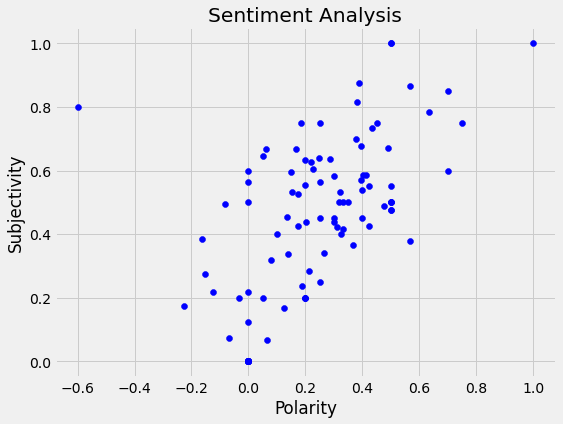

In [ ]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(x = df['Polarity'][i], y = df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Get the percentage of poistivi tweets

ptweets = (df['Analysis'].value_counts()/df.shape[0])*100
ptweets


Positive    73.0
Neutral     19.0
Negative     8.0
Name: Analysis, dtype: float64

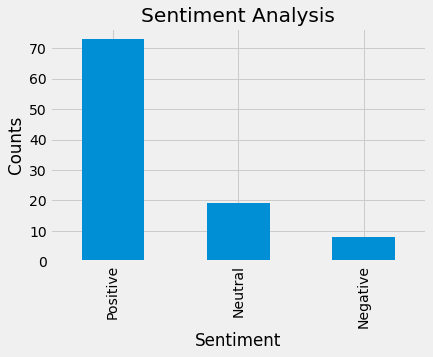

In [ ]:
# Value counts bar plot

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')

plt.show()

Analysis - As we can see most of the tweets from Bill Gates are Positive and very few are negative. We can say he is very positive person and spread good news most of the time. From the word cloud we have generated we can say that he is more focused on Future. And he is concen about the world issues like Climate Change and Covid-19. 

